In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as stats

## 1. Download and clean data and create DataFrame


In [2]:
df= pd.read_csv("Data/Clean Data/HappynessCleanDataFinal.csv")
df.head(3) # Everything is in there 

,Unnamed: 0,Country,Region,Happiness2015,GDP2015,Freedom2015,Generosity2015,Year2015,Corruption2015,Happiness2016,...,Freedom2020,Generosity2020,Year2020,Corruption2020,Happiness2021,GDP2021,Freedom2021,Generosity2021,Year2021,Corruption2021
0,0,Switzerland,Western Europe,7.587,1.39651,0.66557,0.29678,2015,0.41978,7.509,...,0.921337,0.269056,2020,0.303728,7.571,1.566,0.919,0.204,2021,0.292
1,1,Iceland,Western Europe,7.561,1.30232,0.62877,0.43630,2015,0.14145,7.501,...,0.948892,0.362330,2020,0.711710,7.554,1.482,0.955,0.293,2021,0.673
2,2,Denmark,Western Europe,7.527,1.32548,0.64938,0.34139,2015,0.48357,7.526,...,0.951444,0.242793,2020,0.168489,7.620,1.502,0.946,0.208,2021,0.179


## 2. Check Data and print length od the columns since we have many columns

In [49]:
print(len(df.columns))
df.columns

45


Index(['Unnamed: 0', 'Country', 'Region', 'Happiness2015', 'GDP2015',
       'Freedom2015', 'Generosity2015', 'Year2015', 'Corruption2015',
       'Happiness2016', 'GDP2016', 'Freedom2016', 'Generosity2016', 'Year2016',
       'Corruption2016', 'Happiness2017', 'GDP2017', 'Freedom2017',
       'Generosity2017', 'Year2017', 'Corruption2017', 'Happiness2018',
       'GDP2018', 'Freedom2018', 'Generosity2018', 'Year2018',
       'Corruption2018', 'Happiness2019', 'GDP2019', 'Freedom2019',
       'Generosity2019', 'Year2019', 'Corruption2019', 'Happiness2020',
       'GDP2020', 'Freedom2020', 'Generosity2020', 'Year2020',
       'Corruption2020', 'Happiness2021', 'GDP2021', 'Freedom2021',
       'Generosity2021', 'Year2021', 'Corruption2021'],
      dtype='object')

## 3. Extract happiness index for all years .of counties in all regions

In [4]:
# this is extraction of happiness
happiness_df = df[["Country","Region","Happiness2015","Happiness2016","Happiness2017","Happiness2018","Happiness2019","Happiness2020","Happiness2021"]]
happiness_df.head(3)

,Country,Region,Happiness2015,Happiness2016,Happiness2017,Happiness2018,Happiness2019,Happiness2020,Happiness2021
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,7.5599,7.571
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,7.5045,7.554
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,7.6456,7.620


In [5]:
gdp_df = df[["Country","Region","GDP2015","GDP2016","GDP2017","GDP2018","GDP2019","GDP2020","GDP2021"]]
gdp_df.head(3)

,Country,Region,GDP2015,GDP2016,GDP2017,GDP2018,GDP2019,GDP2020,GDP2021
0,Switzerland,Western Europe,1.39651,1.52733,1.564980,1.420,1.452,1.390774,1.566
1,Iceland,Western Europe,1.30232,1.42666,1.480633,1.343,1.380,1.326502,1.482
2,Denmark,Western Europe,1.32548,1.44178,1.482383,1.351,1.383,1.326949,1.502


In [6]:
combined_df = pd.merge(happiness_df, gdp_df, on ="Country")

In [7]:
combined_df.head(3)

,Country,Region_x,Happiness2015,Happiness2016,Happiness2017,Happiness2018,Happiness2019,Happiness2020,Happiness2021,Region_y,GDP2015,GDP2016,GDP2017,GDP2018,GDP2019,GDP2020,GDP2021
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,7.5599,7.571,Western Europe,1.39651,1.52733,1.564980,1.420,1.452,1.390774,1.566
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,7.5045,7.554,Western Europe,1.30232,1.42666,1.480633,1.343,1.380,1.326502,1.482
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,7.6456,7.620,Western Europe,1.32548,1.44178,1.482383,1.351,1.383,1.326949,1.502


In [8]:
del combined_df["Region_y"]

In [9]:
combined_df.head(3)

,Country,Region_x,Happiness2015,Happiness2016,Happiness2017,Happiness2018,Happiness2019,Happiness2020,Happiness2021,GDP2015,GDP2016,GDP2017,GDP2018,GDP2019,GDP2020,GDP2021
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,7.5599,7.571,1.39651,1.52733,1.564980,1.420,1.452,1.390774,1.566
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,7.5045,7.554,1.30232,1.42666,1.480633,1.343,1.380,1.326502,1.482
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,7.6456,7.620,1.32548,1.44178,1.482383,1.351,1.383,1.326949,1.502


In [10]:
combined_df = combined_df.rename(columns = {"Region_x":"Region"})

In [11]:
# this is extraction of GDP only 
gdp_df = df[["Country","Region","GDP2015","GDP2016","GDP2017","GDP2018","GDP2019","GDP2020","GDP2021"]]
gdp_df.head(3)

,Country,Region,GDP2015,GDP2016,GDP2017,GDP2018,GDP2019,GDP2020,GDP2021
0,Switzerland,Western Europe,1.39651,1.52733,1.564980,1.420,1.452,1.390774,1.566
1,Iceland,Western Europe,1.30232,1.42666,1.480633,1.343,1.380,1.326502,1.482
2,Denmark,Western Europe,1.32548,1.44178,1.482383,1.351,1.383,1.326949,1.502


In [12]:
combined_df.head(3)

,Country,Region,Happiness2015,Happiness2016,Happiness2017,Happiness2018,Happiness2019,Happiness2020,Happiness2021,GDP2015,GDP2016,GDP2017,GDP2018,GDP2019,GDP2020,GDP2021
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,7.5599,7.571,1.39651,1.52733,1.564980,1.420,1.452,1.390774,1.566
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,7.5045,7.554,1.30232,1.42666,1.480633,1.343,1.380,1.326502,1.482
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,7.6456,7.620,1.32548,1.44178,1.482383,1.351,1.383,1.326949,1.502


In [13]:
combined_df.describe()

,Happiness2015,Happiness2016,Happiness2017,Happiness2018,Happiness2019,Happiness2020,Happiness2021,GDP2015,GDP2016,GDP2017,GDP2018,GDP2019,GDP2020,GDP2021
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,5.412199,5.408949,5.417596,5.449449,5.494691,5.550569,5.576309,0.858685,0.961706,1.000410,0.903081,0.927544,0.885675,0.981243
std,1.158955,1.152187,1.118040,1.103515,1.089371,1.098698,1.084872,0.385718,0.396446,0.396647,0.361743,0.371994,0.356074,0.399954
min,2.839000,2.905000,2.905000,2.905000,3.203000,2.566900,2.523000,0.015300,0.068310,0.091623,0.076000,0.046000,0.000000,0.000000
25%,4.553250,4.412250,4.542500,4.568000,4.667750,4.781475,4.869750,0.594172,0.683680,0.724225,0.649500,0.669000,0.612291,0.666000
50%,5.309000,5.351500,5.317500,5.477500,5.495000,5.550900,5.665000,0.920510,1.032345,1.077181,0.977000,0.994500,0.938030,1.026500
75%,6.296750,6.331750,6.164750,6.194750,6.198250,6.286650,6.311000,1.152320,1.270918,1.314731,1.190250,1.225000,1.175032,1.312500
max,7.587000,7.526000,7.537000,7.632000,7.769000,7.808700,7.842000,1.563910,1.697520,1.741944,1.576000,1.609000,1.536676,1.751000


In [14]:
# average GDP is for the world
world_ave_gdp_df= gdp_df.mean()
world_ave_gdp_df

GDP2015    0.858685
GDP2016    0.961706
GDP2017    1.000410
GDP2018    0.903081
GDP2019    0.927544
GDP2020    0.885675
GDP2021    0.981243
dtype: float64

In [15]:
# average happiness for the world by year
world_avg_happiness_df = happiness_df.mean()
world_avg_happiness_df

Happiness2015    5.412199
Happiness2016    5.408949
Happiness2017    5.417596
Happiness2018    5.449449
Happiness2019    5.494691
Happiness2020    5.550569
Happiness2021    5.576309
dtype: float64

In [16]:
years = world_ave_gdp_df.keys()
years

Index(['GDP2015', 'GDP2016', 'GDP2017', 'GDP2018', 'GDP2019', 'GDP2020',
       'GDP2021'],
      dtype='object')

In [17]:
happiness_df=happiness_df.set_index("Country")

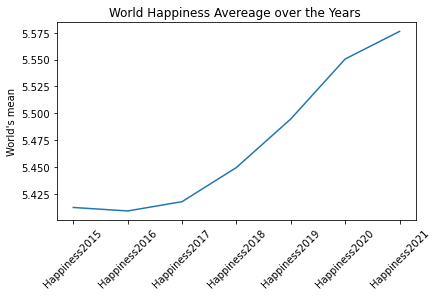

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [18]:
world_avg_happiness_df.plot(label="World Data", rot=45)
plt.tight_layout()
plt.title("World Happiness Avereage over the Years ")
plt.ylabel("World's mean")
plt.show()
plt.tight_layout()
plt.figure()
plt.clf()
#country_one, = plt.plot(years,happiness_df.loc["Switzerland",["Happiness2015","Happiness2015","Happiness2016","Happiness2017","Happiness2018","Happiness2019","Happiness2020","Happiness2021",]],
                     #   color = 'green', label = happiness_df.loc['Switzerland',"Country"])
# # combined_df.plotloc["Switzerland", "Happiness2015":"Happiness2021"].plot(label = "Switzerland")

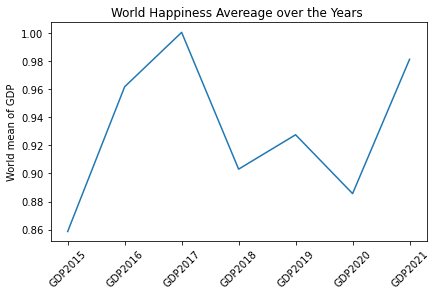

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
world_ave_gdp_df.plot(label="World GDP Data", rot=45)
plt.tight_layout()
plt.title("World Happiness Avereage over the Years ")
plt.ylabel("World mean of GDP")
plt.show()
plt.tight_layout()
plt.figure()
plt.clf()

In [20]:
# mult_plot = combined_df.plot(kind= "bar", figsize=(20,5))
# mult_plot.set_xticklabels(combined_df["Region"], rotation = 90)

# plt.show()
# plt.tight_layout()

In [21]:
region_df = combined_df["Region"].value_counts()

In [22]:
region_df

Sub-Saharan Africa                 30
Central and Eastern Europe         28
Western Europe                     20
Latin America and Caribbean        20
Middle East and Northern Africa    16
Southeastern Asia                   8
Southern Asia                       6
Eastern Asia                        4
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [23]:
world_ave_gdp_df.describe()

count    7.000000
mean     0.931192
std      0.052218
min      0.858685
25%      0.894378
50%      0.927544
75%      0.971475
max      1.000410
dtype: float64

In [24]:
happiness_df.columns

Index(['Region', 'Happiness2015', 'Happiness2016', 'Happiness2017',
       'Happiness2018', 'Happiness2019', 'Happiness2020', 'Happiness2021'],
      dtype='object')

In [25]:
combined_df.columns


Index(['Country', 'Region', 'Happiness2015', 'Happiness2016', 'Happiness2017',
       'Happiness2018', 'Happiness2019', 'Happiness2020', 'Happiness2021',
       'GDP2015', 'GDP2016', 'GDP2017', 'GDP2018', 'GDP2019', 'GDP2020',
       'GDP2021'],
      dtype='object')

In [26]:
comb_bar = combined_df.loc[:,'Region':'GDP2021']
comb_bar.head(3)

,Region,Happiness2015,Happiness2016,Happiness2017,Happiness2018,Happiness2019,Happiness2020,Happiness2021,GDP2015,GDP2016,GDP2017,GDP2018,GDP2019,GDP2020,GDP2021
0,Western Europe,7.587,7.509,7.494,7.487,7.480,7.5599,7.571,1.39651,1.52733,1.564980,1.420,1.452,1.390774,1.566
1,Western Europe,7.561,7.501,7.504,7.495,7.494,7.5045,7.554,1.30232,1.42666,1.480633,1.343,1.380,1.326502,1.482
2,Western Europe,7.527,7.526,7.522,7.555,7.600,7.6456,7.620,1.32548,1.44178,1.482383,1.351,1.383,1.326949,1.502


Text(0.5, 879.0, 'Happiness index')

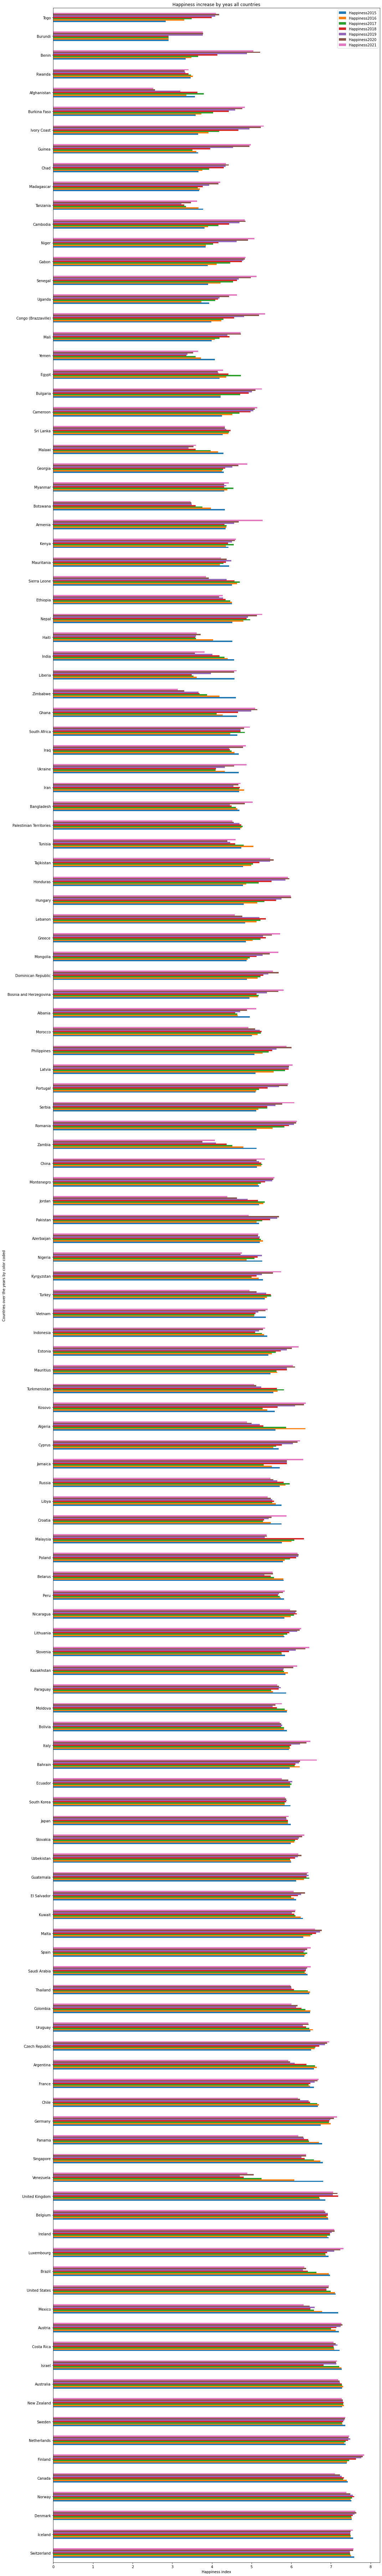

In [27]:
multi_plot = happiness_df.plot(kind = "barh",figsize = (15,100)) 
plt.tight_layout()
plt.title("Happiness increase by yeas all countries")
plt.ylabel("Countries over the years by color coded")
plt.xlabel("Happiness index")

Text(0.5, 879.0, 'GPDs index')

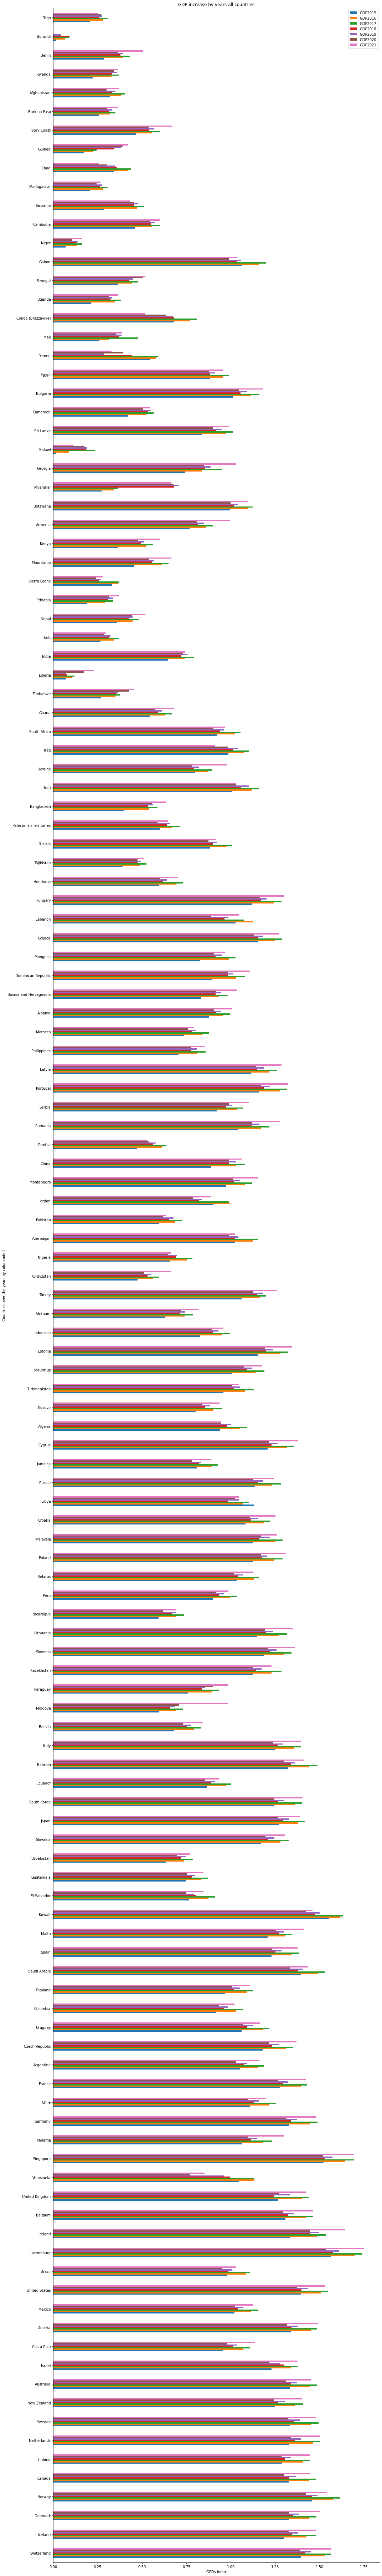

In [28]:
gdp_df=gdp_df.set_index("Country")
multi_plot = gdp_df.plot(kind = "barh",figsize = (15,100)) 
plt.tight_layout()
plt.title("GDP increase by years all countries")
plt.ylabel("Countries over the years by color coded")
plt.xlabel("GPDs index")

In [29]:
happy_cols = combined_df.loc[:,'Happiness2015':'Happiness2021']

In [30]:
combined_df["Happiness Mean"] = happy_cols.mean(axis = 1)

In [31]:
gdp_cols = combined_df.loc[:,'GDP2015':'GDP2021']

In [32]:
combined_df["GDP Mean"] = gdp_cols.mean(axis=1)

In [33]:
combined_df.head(3)

,Country,Region,Happiness2015,Happiness2016,Happiness2017,Happiness2018,Happiness2019,Happiness2020,Happiness2021,GDP2015,GDP2016,GDP2017,GDP2018,GDP2019,GDP2020,GDP2021,Happiness Mean,GDP Mean
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,7.5599,7.571,1.39651,1.52733,1.564980,1.420,1.452,1.390774,1.566,7.526843,1.473942
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,7.5045,7.554,1.30232,1.42666,1.480633,1.343,1.380,1.326502,1.482,7.516214,1.391588
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,7.6456,7.620,1.32548,1.44178,1.482383,1.351,1.383,1.326949,1.502,7.570800,1.401799


In [34]:
new_df = combined_df[["Country","Region","Happiness Mean","GDP Mean"]]
new_df.head(5)

,Country,Region,Happiness Mean,GDP Mean
0,Switzerland,Western Europe,7.526843,1.473942
1,Iceland,Western Europe,7.516214,1.391588
2,Denmark,Western Europe,7.570800,1.401799
3,Norway,Western Europe,7.512143,1.509159
4,Canada,North America,7.298300,1.384185


In [35]:
round_happy =new_df["Happiness Mean"].apply(np.ceil)
round_happy

0      8.0
1      8.0
2      8.0
3      8.0
4      8.0
      ... 
131    4.0
132    4.0
133    5.0
134    4.0
135    4.0
Name: Happiness Mean, Length: 136, dtype: float64

In [36]:
new_rounded_df = pd.concat([new_df, round_happy], axis=1)
new_rounded_df.columns

Index(['Country', 'Region', 'Happiness Mean', 'GDP Mean', 'Happiness Mean'], dtype='object')

In [37]:

new_rounded_df.columns=['Country', 'Region', 'Happiness Mean', 'GDP Mean', 'Rounded Happy']
new_rounded_df

,Country,Region,Happiness Mean,GDP Mean,Rounded Happy
0,Switzerland,Western Europe,7.526843,1.473942,8.0
1,Iceland,Western Europe,7.516214,1.391588,8.0
2,Denmark,Western Europe,7.570800,1.401799,8.0
3,Norway,Western Europe,7.512143,1.509159,8.0
4,Canada,North America,7.298300,1.384185,8.0
...,...,...,...,...,...
131,Afghanistan,Southern Asia,3.236271,0.350896,4.0
132,Rwanda,Sub-Saharan Africa,3.417186,0.331076,4.0
133,Benin,Sub-Saharan Africa,4.252286,0.393853,5.0
134,Burundi,Sub-Saharan Africa,3.277900,0.044605,4.0


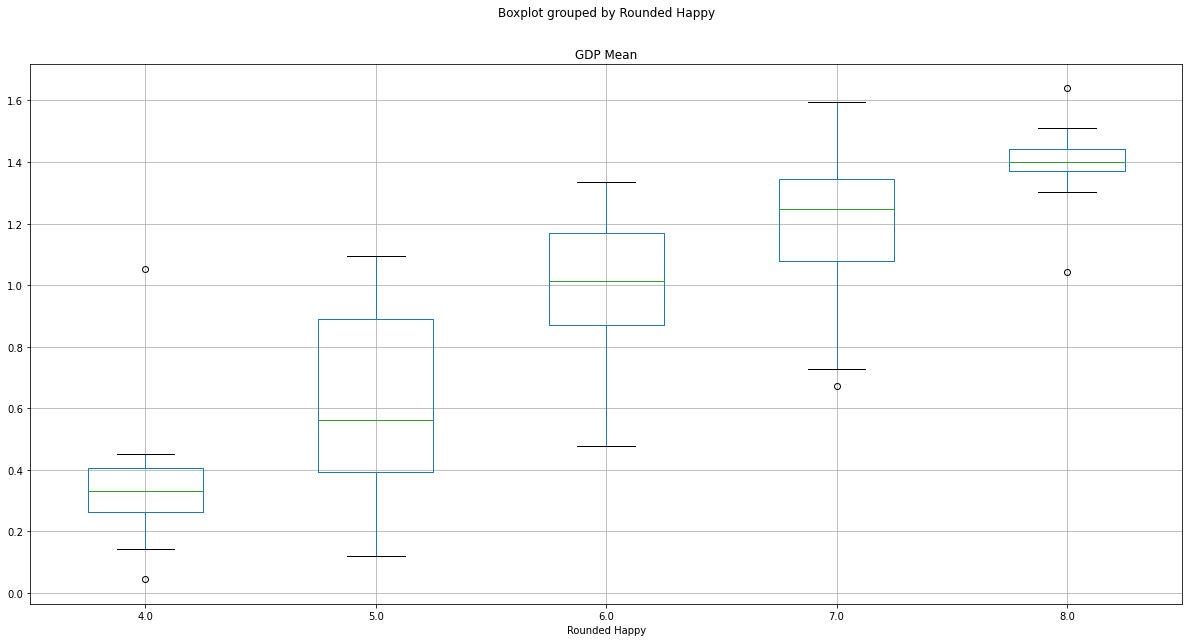

In [38]:
new_rounded_df.boxplot("GDP Mean", by="Rounded Happy", figsize=(20, 10))

In [39]:
new_df.set_index("Country")


,Region,Happiness Mean,GDP Mean
Country,,,
Switzerland,Western Europe,7.526843,1.473942
Iceland,Western Europe,7.516214,1.391588
Denmark,Western Europe,7.570800,1.401799
Norway,Western Europe,7.512143,1.509159
Canada,North America,7.298300,1.384185
...,...,...,...
Afghanistan,Southern Asia,3.236271,0.350896
Rwanda,Sub-Saharan Africa,3.417186,0.331076
Benin,Sub-Saharan Africa,4.252286,0.393853


In [40]:
new_df= new_df.sort_values(by='GDP Mean', ascending=False)
top_happy = new_df.round(decimals=2).head(15)
group1 = new_rounded_df[new_rounded_df["Rounded Happy"] == 4]["GDP Mean"]
group2 = new_rounded_df[new_rounded_df["Rounded Happy"] == 5]["GDP Mean"]
group3 = new_rounded_df[new_rounded_df["Rounded Happy"] == 6]["GDP Mean"]
group4 = new_rounded_df[new_rounded_df["Rounded Happy"] == 7]["GDP Mean"]
group5 = new_rounded_df[new_rounded_df["Rounded Happy"] == 8]["GDP Mean"]


In [41]:
stats.f_oneway(group1, group2, group3, group4, group5)
# below is my pvalue < 0.05 so it rejects null hypothesis 


F_onewayResult(statistic=56.670624249813926, pvalue=1.1367658484570351e-27)

In [42]:
new_df= new_df.sort_values(by='GDP Mean', ascending=False).round(decimals=2)
new_df.head(20)

,Country,Region,Happiness Mean,GDP Mean
16,Luxembourg,Western Europe,7.03,1.64
21,Singapore,Southeastern Asia,6.50,1.60
34,Kuwait,Middle East and Northern Africa,6.14,1.52
3,Norway,Western Europe,7.51,1.51
17,Ireland,Western Europe,7.00,1.48
0,Switzerland,Western Europe,7.53,1.47
14,United States,North America,6.98,1.46
31,Saudi Arabia,Middle East and Northern Africa,6.40,1.42
6,Netherlands,Western Europe,7.42,1.41
7,Sweden,Western Europe,7.33,1.40


In [43]:
new_df= new_df.sort_values(by=["Happiness Mean","GDP Mean"], ascending=False).round(decimals=2)
new_df.tail(20)

,Country,Region,Happiness Mean,GDP Mean
106,Mauritania,Sub-Saharan Africa,4.34,0.58
116,Egypt,Middle East and Northern Africa,4.33,0.92
130,Burkina Faso,Sub-Saharan Africa,4.28,0.32
133,Benin,Sub-Saharan Africa,4.25,0.39
120,Uganda,Sub-Saharan Africa,4.17,0.32
128,Guinea,Sub-Saharan Africa,4.17,0.31
101,India,Southern Asia,4.13,0.73
127,Chad,Sub-Saharan Africa,4.11,0.35
100,Liberia,Sub-Saharan Africa,4.05,0.12
126,Madagascar,Sub-Saharan Africa,3.87,0.26


In [44]:
x_values = new_df["Happiness Mean"]
y_values = new_df["GDP Mean"]

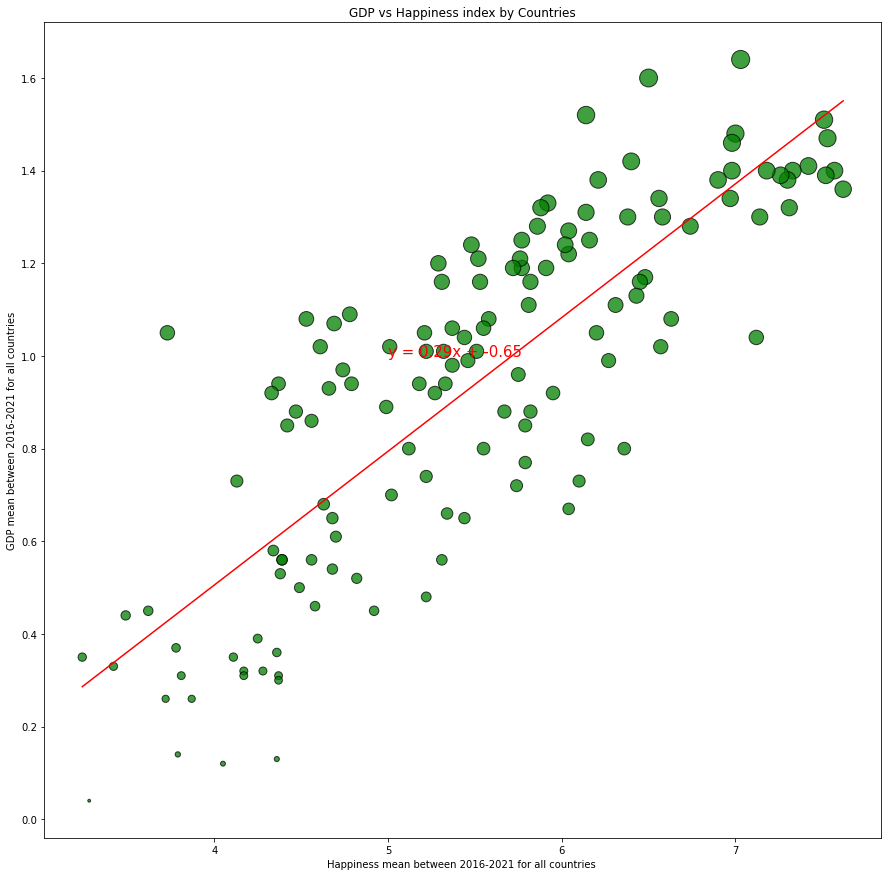

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize=(15,15))
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
plt.scatter(x_values,y_values,marker = "o", facecolors ="green", edgecolors = "black", s=y_values*200, alpha = 0.75)
regress_values = x_values*slope+intercept
lin_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(lin_eq,(5,1), fontsize = 15, color ="red")
plt.title("GDP vs Happiness index by Countries")
plt.xlabel("Happiness mean between 2016-2021 for all countries ")
plt.ylabel("GDP mean between 2016-2021 for all countries" )
plt.show()
plt.tight_layout()
plt.figure()
plt.clf()

In [46]:
correlation = stats.pearsonr(x_values,y_values)
correlation

(0.8247713339896519, 5.524167874543727e-35)